In [1]:
import pandas as pd
import numpy as np

# Here we have two kind of datasets:



1- data_long has all the test results we needed for the fu_years categories like:

        blood measures
        cognitions
        Progressive metrics used for cognitions
        demographics
        Disabilites
        lifestyle
        Medical conditions-(cumulative of them)
        Medications currently going on
        
2- data_basic has all informations for:

        brain protiens 
        age_death
        race,sex,educ, 
        baselines for all medical conditions 
        pathology test results


In [2]:
data_long = pd.read_excel("/Users/charusaxena/Dropbox/RADC dataset/dataset_576_long.xlsx")
data_basic = pd.read_excel("/Users/charusaxena/Dropbox/RADC dataset/dataset_576_basic.xlsx")

In [3]:
df = data_long.copy()
df2 = data_basic.copy()
df.head()
df2.head()

print("shape for df",df.shape)
print("shape for df2",df2.shape)

shape for df (25570, 203)
shape for df2 (3311, 49)


# Lets start with the Exploratory Data analysis for this:

In [4]:
#print(df1.isnull().sum())
print(df2.isnull().sum())

projid                    0
study                     0
scaled_to              1860
apoe_genotype           605
tomm40_hap              981
synap_6_complex1       2887
synap_6_complex2       2887
synap_6_snap25         2887
synap_6_synaptophys    2887
synap_6_syntaxin       2887
synap_6_vamp           2887
zcapture_syn_6         2887
zcomplexin_6           2887
zsnare_6               2887
age_death              1640
educ                      3
msex                      1
race                     11
spanish                   2
hypertension_bl           4
cancer_bl                 5
diabetes_sr_rx_bl         2
headinjrloc_bl           13
med_con_sum_bl            5
thyroid_bl                5
chf_bl                 1610
claudication_bl           9
heart_bl                  6
stroke_bl               255
braaksc                1883
ceradsc                1883
gpath                  1895
niareagansc            1883
pmi                    1868
amyloid                1935
plaq_d              

In [5]:
#for dataset long
total_cells= np.product(df.shape)
missing_data = df.isnull().sum()
missing = missing_data.sum()
percentage = (missing/total_cells)*100

#for dataset basic
total_cells1= np.product(df2.shape)
missing_data1 = df2.isnull().sum()
missing1 = missing_data1.sum()
percentage1 = (missing1/total_cells1)*100

print("the total missing percentage data in data_long is: ",percentage)
print("the total missing percentage data in data_basic is: ",percentage1)

the total missing percentage data in data_long is:  15.2792970518
the total missing percentage data in data_basic is:  43.8451913535


We observe that we have only 15% of missing data from long whereas we have nearly half of the dataset empty in case of basic

# As suggested will keep important features only in data_long:

In [6]:
del df["anemia_who"]

del df["bun"]
del df["cl"]
del df["co2"]
del df["fasting"]
del df["k"]
del df["na"]

In [7]:
del df["rdw"]
del df["tga"]
del df["tsh"]
del df["wbc"]

del df["confid_health"]
del df["confid_instit"]
del df["finfintot"]
del df["finhlthtot"]
del df["finuctot"]
del df["fraud7"]
del df["scam"]
del df["gamma"]
del df["risk"]
del df["large_alpha"]
del df["small_alpha"]
del df["fin_literacy_pct"]
del df["health_literacy_pct"]
del df["literacy_total_pct"]

del df["thyroid_cum"]
del df["chf_cum"]
del df["heart_cum"]

del df["antibiotic_rx"]
del df["antihyp_all_rx"]
del df["antineoplastic_rx"]
del df["cardiac_rx"]
del df["dental_rx"]
del df["dermatologic_rx"]
del df["endocrine_rx"]
del df["gastrointestinal_rx"]
del df["hemotologic_rx"]
del df["lipid_lowering_rx"]

In [8]:
del df["musculoskeletal_rx"]
del df["ophthalmic_rx"]
del df["otic_rx"]
del df["respiratory_rx"]
del df["supplement_rx"]
del df["urinary_rx"]
del df["acetaminophen_rx"]
del df["antiinfective_rx"]
del df["vaccine_rx"]
del df["antiarrhythmic_rx"]

In [9]:
del df["diabetes_rx"]
del df["antacid_rx"]
del df["antidiarrheal_rx"]
del df["antinausea_rx"]
del df["antireflux_rx"]
del df["laxative_rx"]

In [10]:
del df["anticoagulant_rx"]
del df["osteoporosis_rx"]
del df["antiasthmatic_rx"]
del df["antihistamine_rx"]
del df["coughcoldallergy_rx"]
del df["nasal_rx"]
del df["alternative_rx"]
del df["cartilage_base_rx"]
del df["fish_oil_supplement_rx"]
del df["glucosamine_rx"]
del df["herbals_rx"]

In [11]:
del df["macronutrient_rx"]
del df["micronutrient_rx"]
del df["mineral_rx"]
del df["multivitamin_rx"]
del df["nutrient_rx"]
del df["other_dietary_rx"]
del df["vitamin_minerals_rx"]

In [12]:
del df["vitamin_rx"]
del df["alphablocker_rx"]
del df["benign_pros_hyper_rx"]
del df["bphmed_rx"]
del df["estrogen_vaginal_rx"]
del df["urinary_antispas_rx"]
del df["urinary_inc_rx"]



# As suggested will keep important features only in data_basic:

In [13]:
del df2["apoe_genotype"]
del df2["educ"]
#del df2["msex"]
del df2["race"]
del df2["spanish"]
del df2["thyroid_bl"]
del df2["chf_bl"]
del df2["pmi"]


# See the reamining number of features and if there is null values in them:

In [14]:
#for dataset long
total_cells= np.product(df.shape)
missing_data = df.isnull().sum()
missing = missing_data.sum()
percentage = (missing/total_cells)*100

#for dataset basic
total_cells1= np.product(df2.shape)
missing_data1 = df2.isnull().sum()
missing1 = missing_data1.sum()
percentage1 = (missing1/total_cells1)*100

print("the total missing percentage data in data_long is: ",percentage)
print("the total missing percentage data in data_basic is: ",percentage1)

the total missing percentage data in data_long is:  10.4148952275
the total missing percentage data in data_basic is:  48.2015216234


# Removing all people with Cancer and Diabetes and with poeple with head injuries:
    so will be removing paitents who happen to have medical conditions of these two or 
    taking medications prescribed for these two.

In [15]:
df.shape

(25570, 124)

In [16]:
#checking how many unique encodinga are there before removing people:
df.headinjrloc_cum.nunique()

2

In [17]:
#removing people who have a suspected of having cancer in past visits 
df = df[df.cancer_cum !=1]
df2 = df2[df2.cancer_bl !=1]

#removing people who have a suspected of having diabetes in past visits 
df = df[df.dm_cum !=1]
df2 = df2[df2.diabetes_sr_rx_bl !=1]

#removing people who have a suspected of having head injuries in past visits 
df = df[df.headinjrloc_cum !=1]
df2 = df2[df2.headinjrloc_bl !=1]

#medications with analgesic_rx
df = df[df.analgesic_rx !=1]

#medications with insulin
#?? still in doubt 
df = df[df.diabetes_insulin_rx !=1]
df = df[df.diabetes_noninsulin_rx !=1]
#df = df[df.diabetes_rx!=1]

#here it indicates any sort of medical history 1-yes , 0-No
#df2 = df2[df2.diabetes_sr_rx_bl !=1]


In [18]:
del df['dm_cum']
del df['cancer_cum']
del df['headinjrloc_cum']
del df['analgesic_rx']
del df['diabetes_insulin_rx']

del df2['cancer_bl']
del df2['diabetes_sr_rx_bl']
del df2['headinjrloc_bl']
del df['diabetes_noninsulin_rx']


In [19]:
print(df.shape)
print(df2.shape)

(3594, 118)
(1865, 39)


In [20]:
df['projid'].nunique()

1189

In [21]:
df.head()

,projid,study,fu_year,scaled_to,ca,chlstrl,crn,gfr_mdrs,glucose,hba1c,...,depression_rx,bisphosphonate_rx,calcitonin_rx,gout_rx,serm_rx,ad_rx,anticonvulsant_rx,park_rx,non_aspirin_rx,fivehtblocker_rx
1,9121,MAP,1,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9121,MAP,2,ROSMAP,9.4,205.0,0.98,57.803255,77.0,5.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9121,MAP,3,ROSMAP,9.4,230.0,0.89,64.444732,85.0,5.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9121,MAP,4,ROSMAP,9.2,210.0,0.82,70.657593,92.0,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9121,MAP,5,ROSMAP,8.8,201.0,0.85,67.625681,85.0,5.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df2.head()

,projid,study,scaled_to,tomm40_hap,synap_6_complex1,synap_6_complex2,synap_6_snap25,synap_6_synaptophys,synap_6_syntaxin,synap_6_vamp,...,nft,tangles,tdp_stage4,arteriol_scler,caa_4gp,cvda_4gp2,ci_num2_gct,ci_num2_mct,ci_num2_gtt,ci_num2_mtt
0,9121,MAP,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21073,ROS,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
3,130005,MAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,246264,MAP,ROSMAP,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.339145,4.923293,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
7,285563,MAP,ROSMAP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.193574,NaN,2.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN


# Befor merging will select paitents for fu_year=1 as basic_csv has got informartion for that year only.



In [34]:
df_new = df[df['fu_year']==1]
df_new.head()

,projid,study,fu_year,scaled_to,ca,chlstrl,crn,gfr_mdrs,glucose,hba1c,...,depression_rx,bisphosphonate_rx,calcitonin_rx,gout_rx,serm_rx,ad_rx,anticonvulsant_rx,park_rx,non_aspirin_rx,fivehtblocker_rx
1,9121,MAP,1,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,402800,MAP,1,ROSMAP,10.4,237.0,0.94,60.940825,93.0,6.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
72,668310,MAP,1,ROSMAP,8.6,229.0,1.50,46.855148,123.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
118,1172523,MAP,1,ROSMAP,9.8,154.0,1.56,33.388331,81.0,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,1626306,MAP,1,ROSMAP,10.6,268.0,0.76,79.936084,92.0,5.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Outer join and stats

In [35]:
df_combined = pd.merge(df_new,df2,on='projid',how='outer')

In [36]:
df_combined.isnull().sum()

total_cells= np.product(df_combined.shape)
missing_data = df_combined.isnull().sum()
missing = missing_data.sum()
percentage = (missing/total_cells)*100
print("percentage of missing data now in outer join :",percentage)
df_combined.projid.nunique()

percentage of missing data now in outer join : 71.3956004821


1872

In [37]:
df_combined.to_csv("combined_radc_file.csv",sep ='\t',encoding ='utf-8')

# Inner join and stats 

In [38]:
df_combined_inner = pd.merge(df,df2,on='projid',how='inner')
df_combined_inner.head()

,projid,study_x,fu_year,scaled_to_x,ca,chlstrl,crn,gfr_mdrs,glucose,hba1c,...,nft,tangles,tdp_stage4,arteriol_scler,caa_4gp,cvda_4gp2,ci_num2_gct,ci_num2_mct,ci_num2_gtt,ci_num2_mtt
0,9121,MAP,1,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9121,MAP,2,ROSMAP,9.4,205.0,0.98,57.803255,77.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9121,MAP,3,ROSMAP,9.4,230.0,0.89,64.444732,85.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9121,MAP,4,ROSMAP,9.2,210.0,0.82,70.657593,92.0,6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9121,MAP,5,ROSMAP,8.8,201.0,0.85,67.625681,85.0,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
total_cells= np.product(df_combined_inner.shape)
missing_data = df_combined_inner.isnull().sum()
missing = missing_data.sum()
percentage = (missing/total_cells)*100
print("percentage of missing data now in outer join :",percentage)
df_combined_inner.projid.nunique()

percentage of missing data now in outer join : 23.365955316


1097

In [40]:
df_combined_inner.to_csv("combined_inner_radc_file.csv",sep ='\t',encoding ='utf-8')

# to check which features are most empty!!

In [41]:
missing_data

projid                0
study_x               0
fu_year               0
scaled_to_x           0
ca                 1866
chlstrl            1859
crn                1860
gfr_mdrs           1893
glucose            1860
hba1c              2391
hdlchlstrl         1859
hdlratio           1859
hemacrit           1871
hemoglbn           1871
ldlchlstrl         1868
mch                1871
mchc               1871
mcv                1871
platelet           2051
rbc                1871
dcfdx               101
cogn_ep             237
cogn_po             314
cogn_ps             276
cogn_se             268
cogn_wo             130
cogn_global         119
cts_animals         111
cts_bname           263
cts_catflu          111
                   ... 
synap_6_vamp       3188
zcapture_syn_6     3188
zcomplexin_6       3188
zsnare_6           3188
age_death          1865
msex                  0
hypertension_bl       2
med_con_sum_bl        2
claudication_bl       6
heart_bl              7
stroke_bl       

In [42]:
def sort(number,total_rows):
    percentage = (number/total_rows)*100
    return percentage
    

In [44]:
total_rows = df_combined_inner.shape[0]

for i in missing data:
    sort(,total_rows)


SyntaxError: invalid syntax (<ipython-input-44-4a296b54f8fe>, line 3)

# Visualise different categories:
     1. Blood Measures
     2. Brain proteins
     3. Clinical diagnosis(dfcdx)
     4. cognition
     5. Progressive Matrices
     6. Demographics
     7.Disabilities
     8. Lifestyle
     9. Medical Conditions(except cancer,diabetees and head injury)
     10. Medications
     11.Pathalogy

Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sort']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


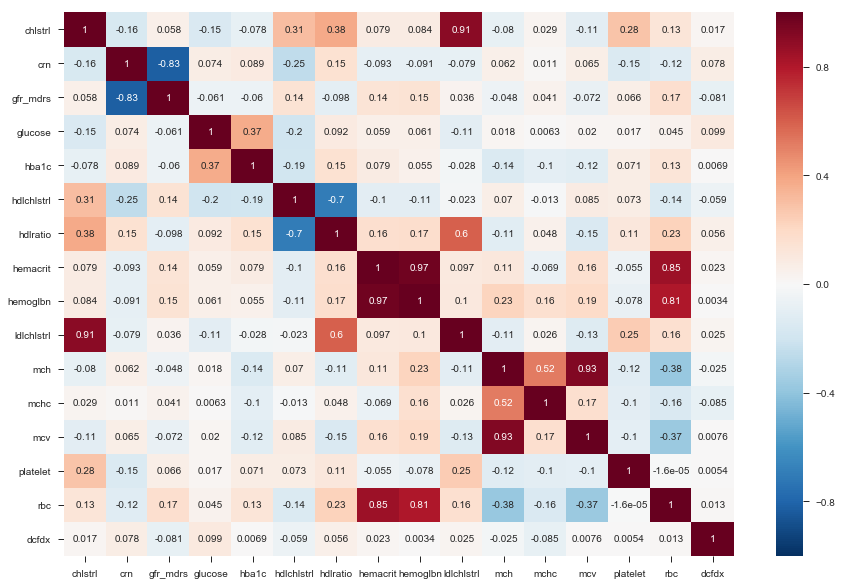

In [45]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%pylab inline
#lets plot some graphics from the first dataset

from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
Bloodmeasure = df_combined_inner.filter(['chlstrl',
                                         'crn','gfr_mdrs'
                                         ,'glucose',
                                         'hba1c','hdlchlstrl',  
'hdlratio',
'hemacrit',
'hemoglbn',
'ldlchlstrl',
'mch',
'mchc',
'mcv',
'platelet', 'rbc','dcfdx'], axis=1)

corr_matrix =Bloodmeasure.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix,annot=True)

# Blood Measures correlations

In [46]:
print("chlstrl: ",df_combined_inner['chlstrl'].corr(df_combined_inner['dcfdx']))

print("crn: ",df_combined_inner['crn'].corr(df_combined_inner['dcfdx']))
print("gfr_mdrs: ",df_combined_inner['gfr_mdrs'].corr(df_combined_inner['dcfdx']))
print("glucose: ",df_combined_inner['glucose'].corr(df_combined_inner['dcfdx']))
print("hba1c: ",df_combined_inner['hba1c'].corr(df_combined_inner['dcfdx']))
print("hdlchlstrl: ",df_combined_inner['hdlchlstrl'].corr(df_combined_inner['dcfdx']))
print("hdlratio: ",df_combined_inner['hdlratio'].corr(df_combined_inner['dcfdx']))
print("hemacrit: ",df_combined_inner['hemacrit'].corr(df_combined_inner['dcfdx']))
print("hemoglbn: ",df_combined_inner['hemoglbn'].corr(df_combined_inner['dcfdx']))
print("ldlchlstrl: ",df_combined_inner['ldlchlstrl'].corr(df_combined_inner['dcfdx']))

print("mch: ",df_combined_inner['mch'].corr(df_combined_inner['dcfdx']))
print("mchc: ",df_combined_inner['mchc'].corr(df_combined_inner['dcfdx']))
print("mcv: ",df_combined_inner['mcv'].corr(df_combined_inner['dcfdx']))
print("platelet: ",df_combined_inner['platelet'].corr(df_combined_inner['dcfdx']))
print("rbc: ",df_combined_inner['rbc'].corr(df_combined_inner['dcfdx']))


chlstrl:  0.0166659244577
crn:  0.077720921612
gfr_mdrs:  -0.0809019549189
glucose:  0.099181982961
hba1c:  0.00694394085118
hdlchlstrl:  -0.0585419310856
hdlratio:  0.0561147301621
hemacrit:  0.0227000682313
hemoglbn:  0.00340302799132
ldlchlstrl:  0.0251209632278
mch:  -0.0250907248511
mchc:  -0.0854356160758
mcv:  0.00755850461801
platelet:  0.00544310187259
rbc:  0.0132754110392


# Brain proteins correlations

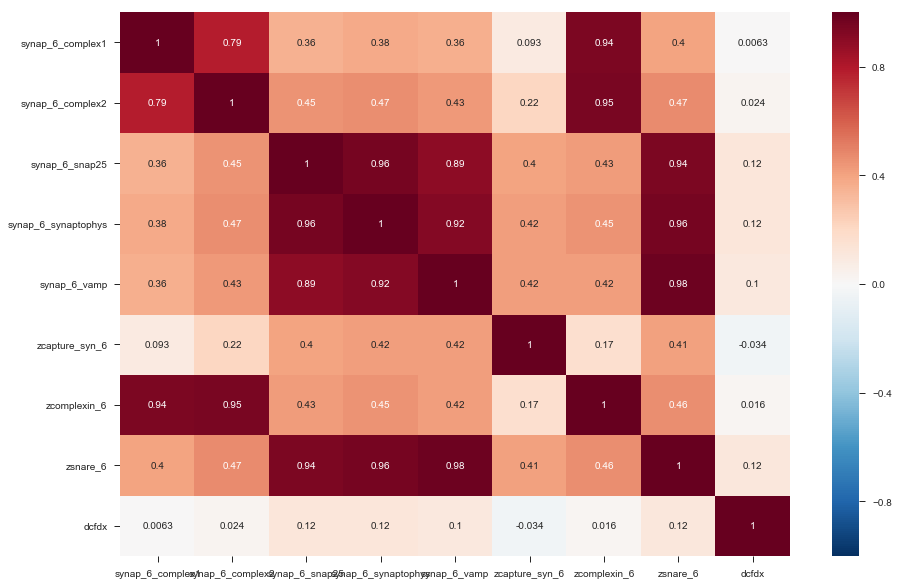

In [47]:
Brainproteins = df_combined_inner.filter(['synap_6_complex1',
                                         'synap_6_complex2',
                                         'synap_6_snap25','synap_6_synaptophys',
                                         'synap_6_vamp',
                                         
'zcapture_syn_6',  
'zcomplexin_6',
'zsnare_6','dcfdx'], axis=1)

corr_matrix1 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix1,annot=True)

# cognition correlations

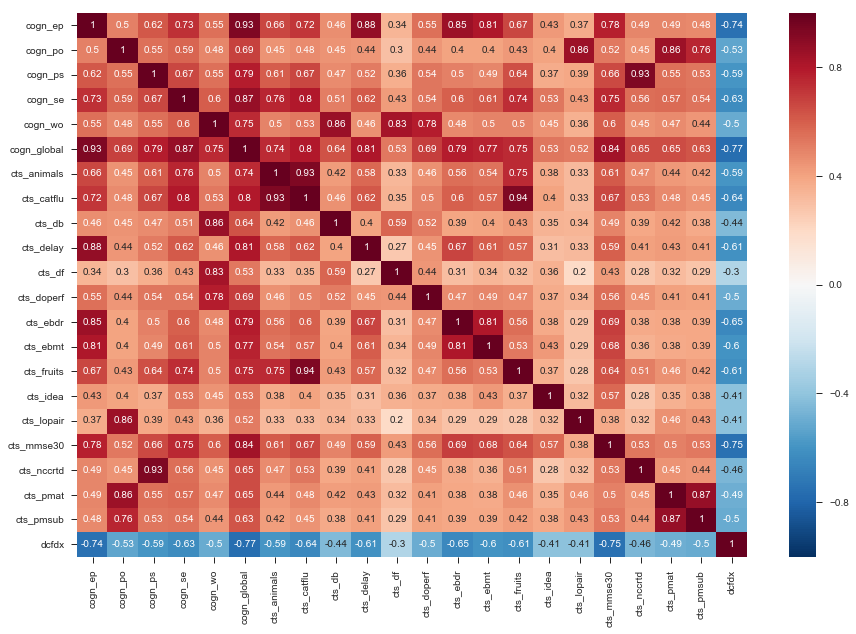

In [48]:
Brainproteins = df_combined_inner.filter(['cogn_ep',
                                         'cogn_po',
                                         'cogn_ps','cogn_se',
                                         'cogn_wo',
                                         
'cogn_global',  
'cts_animals',
'cts_catflu',
 'cts_db','cts_delay','cts_df','cts_doperf','cts_ebdr',
'cts_ebmt','cts_fruits','cts_idea','cts_lopair','cts_mmse30',
'cts_nccrtd','cts_pmat','cts_pmsub','dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# Progressive matrices correlation

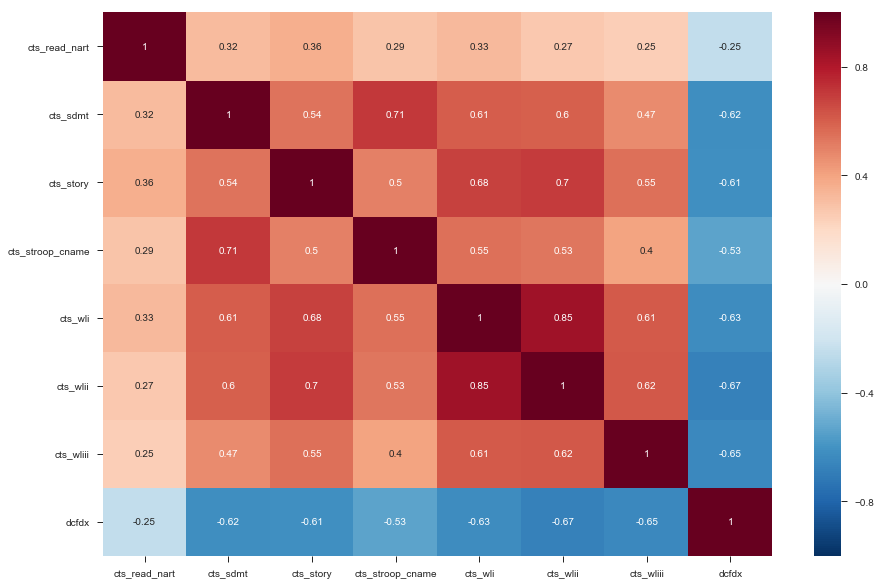

In [49]:
Brainproteins = df_combined_inner.filter(['cts_read_nart',
                                         'cts_sdmt',
                                         'cts_story','cts_stroop_cname',
                                         'cts_wli',
                                         
'cts_wlii',  
'cts_wliii','dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# demographics correlation

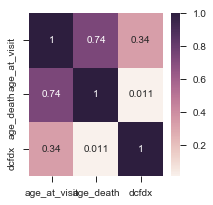

In [50]:
Brainproteins = df_combined_inner.filter(['age_at_visit',
                                         'age_death','dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 3,3
sns.heatmap(corr_matrix2,annot=True)

# Disabilities correlation

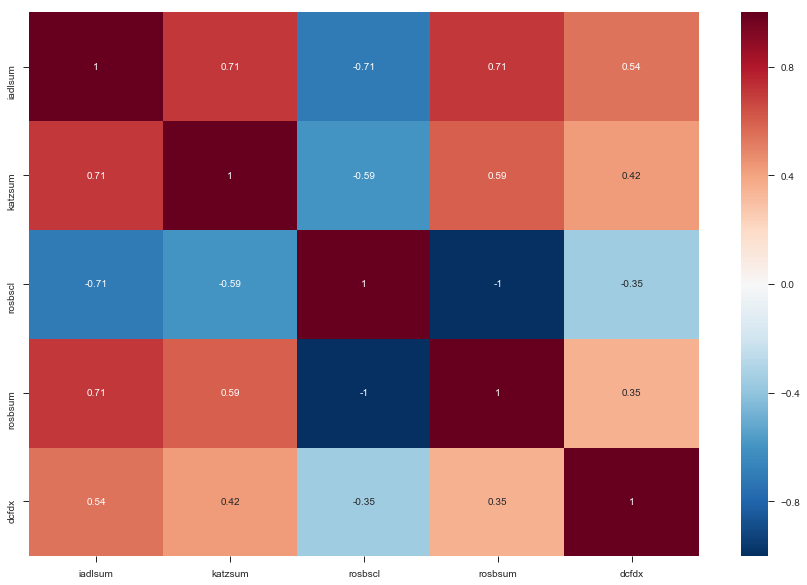

In [51]:
Brainproteins = df_combined_inner.filter(['iadlsum',
                                         'katzsum',
                                         'rosbscl','rosbsum',
                                        'dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# Lifestyle correlation

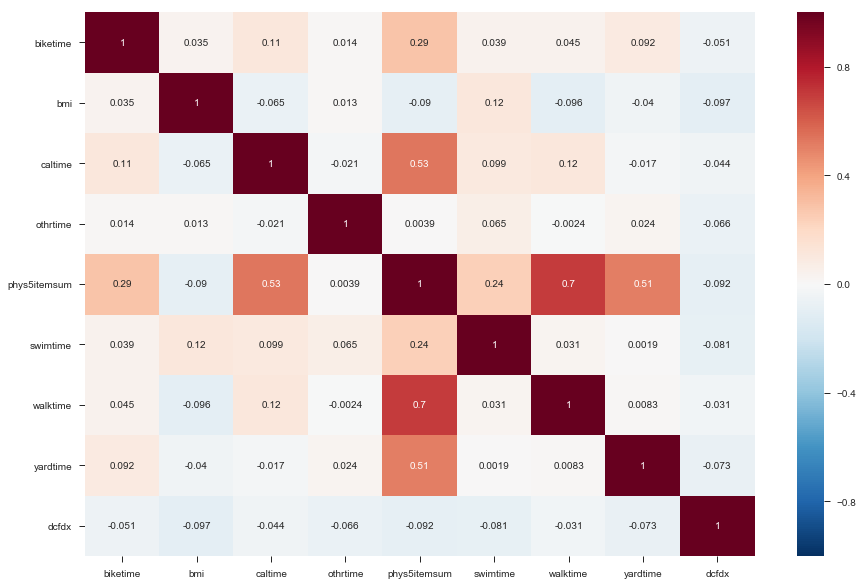

In [52]:
Brainproteins = df_combined_inner.filter(['biketime',
                                         'bmi',
                                         'caltime','othrtime',
'phys5itemsum','swimtime','walktime','yardtime',
                                        'dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# medical conditions correlation

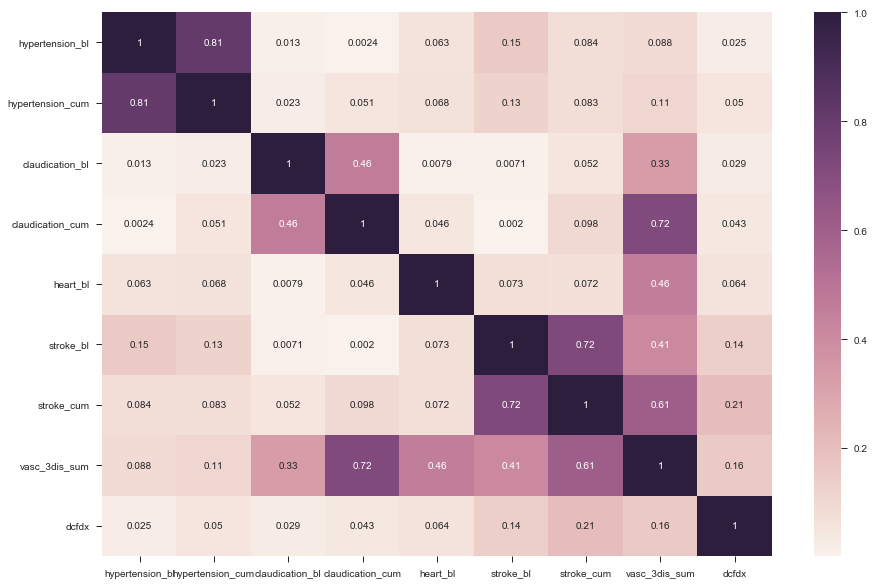

In [53]:
Brainproteins = df_combined_inner.filter(['hypertension_bl',
                                         'hypertension_cum',
                                         'claudication_bl','claudication_cum',
'heart_bl','heart_cum','stroke_bl','stroke_cum',
'vasc_3dis_sum','dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# Medications correlation(77/131)

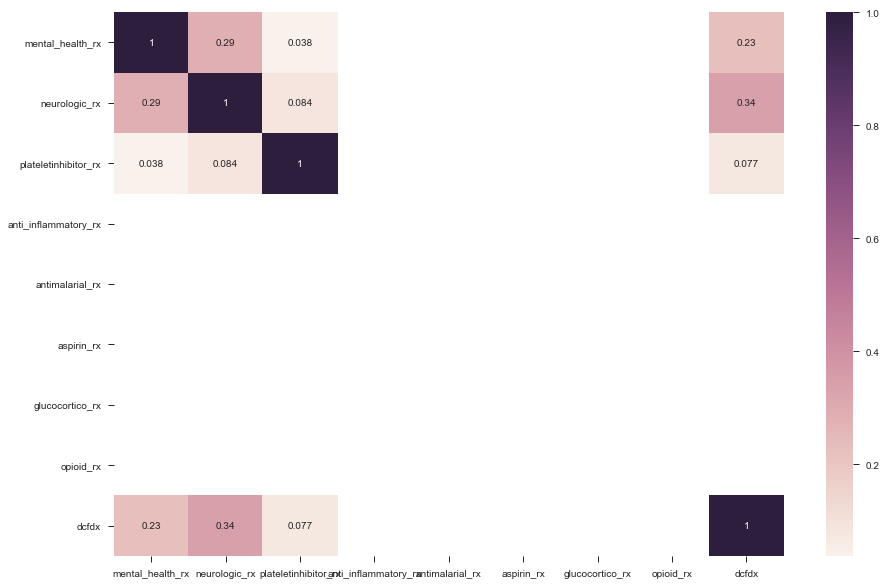

In [54]:
Brainproteins = df_combined_inner.filter(['mental_health_rx',
                                         'neurologic_rx',
                                         'plateletinhibitor_rx',
                                          'anti_inflammatory_rx',
'antimalarial_rx','aspirin_rx','glucocortico_rx','opioid_rx',
 'dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# Antihypertensive medications

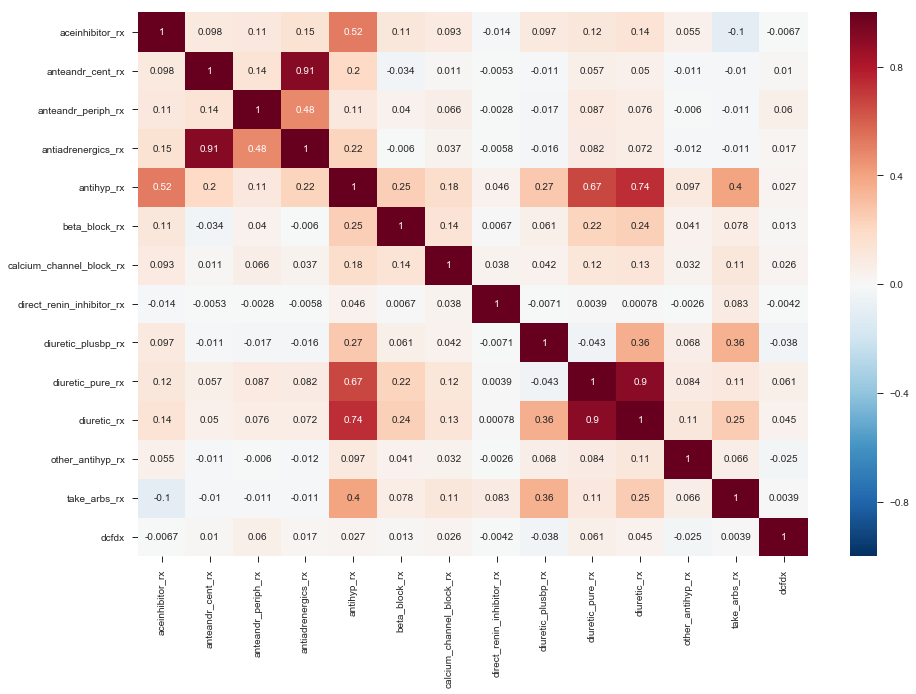

In [55]:
Brainproteins = df_combined_inner.filter([
 'aceinhibitor_rx','anteandr_cent_rx','anteandr_periph_rx',
                                          'antiadrenergics_rx',    
'antihyp_rx','beta_block_rx','calcium_channel_block_rx','direct_renin_inhibitor_rx',
                                          

 'diuretic_plusbp_rx','diuretic_pure_rx','diuretic_rx','other_antihyp_rx',
 'take_arbs_rx','dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# Cardiac medications

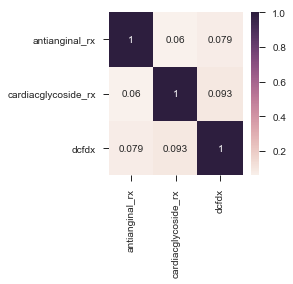

In [56]:
Brainproteins = df_combined_inner.filter(['antianginal_rx','cardiacglycoside_rx','dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 3,3
sns.heatmap(corr_matrix2,annot=True)

# Antihormone medications

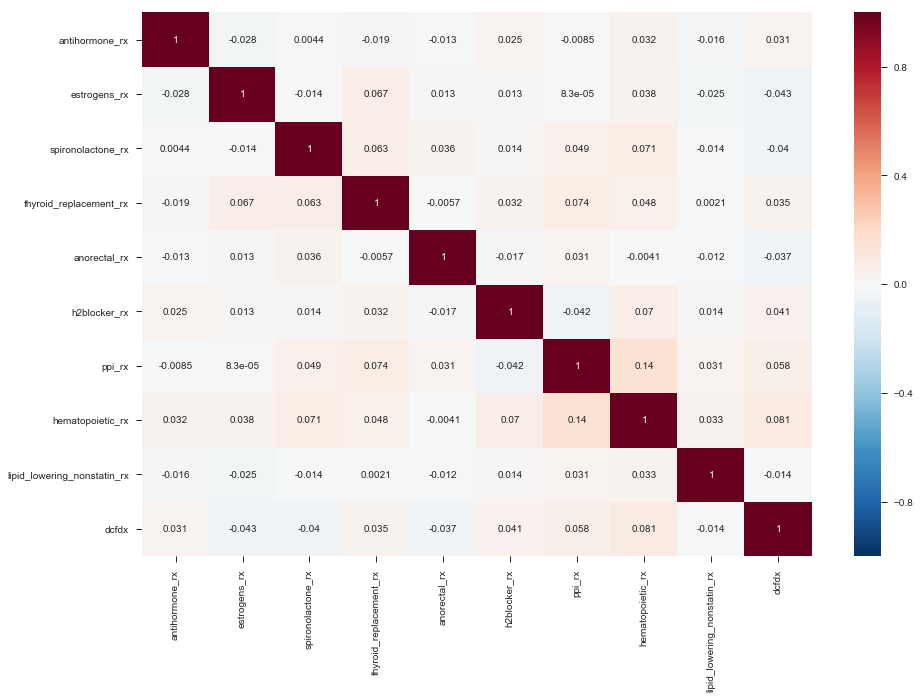

In [57]:
Brainproteins = df_combined_inner.filter(['antihormone_rx',  
                                          
  'estrogens_rx','spironolactone_rx','thyroid_replacement_rx','anorectal_rx',
 'h2blocker_rx','ppi_rx','hematopoietic_rx','lipid_lowering_nonstatin_rx',                                        
                                          
'satin_rx','dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# Gastrointestinal medications

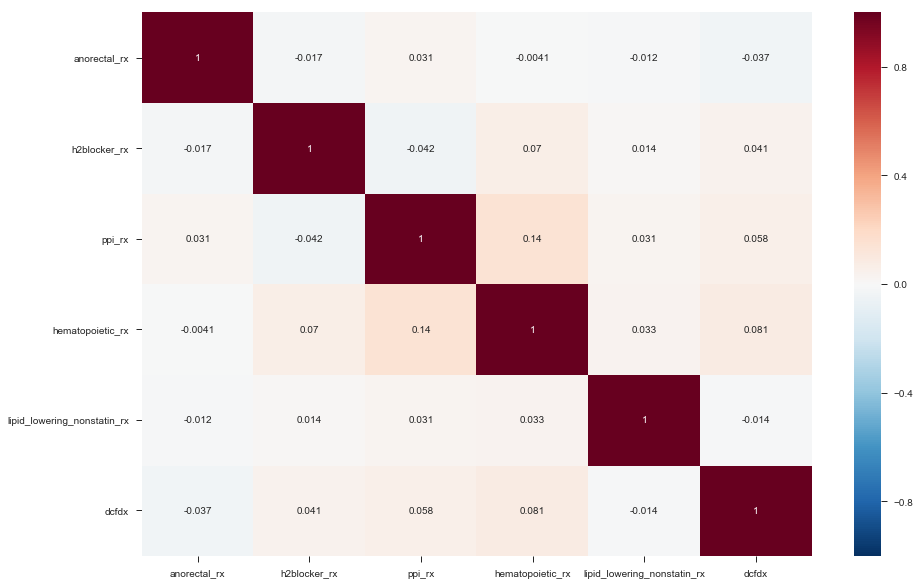

In [58]:
Brainproteins = df_combined_inner.filter(['anorectal_rx',
 'h2blocker_rx','ppi_rx','hematopoietic_rx','lipid_lowering_nonstatin_rx',                                        
                                          
'satin_rx','dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# mental health medications

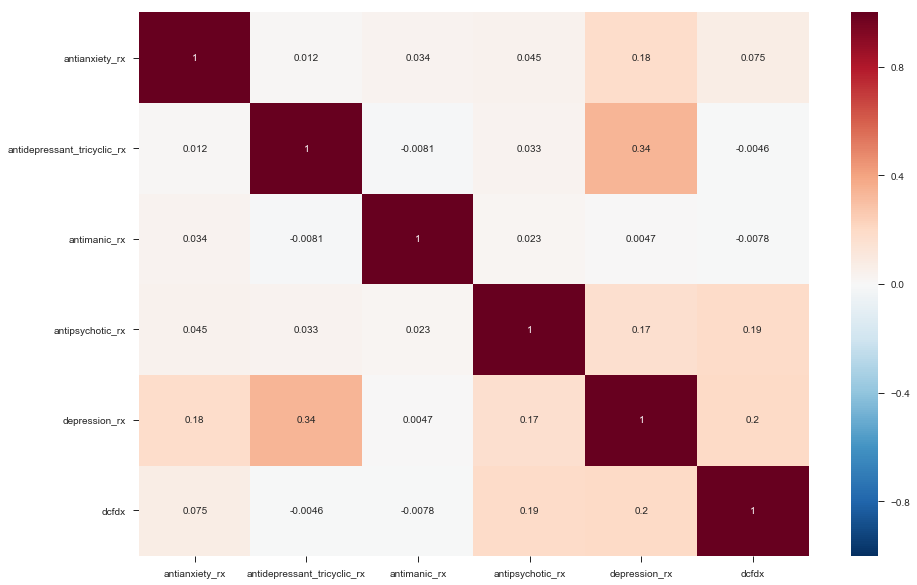

In [59]:
Brainproteins = df_combined_inner.filter(['antianxiety_rx',
 'antidepressant_tricyclic_rx','antimanic_rx','antipsychotic_rx','depression_rx',                                        
'dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# Musculoskeletal medications

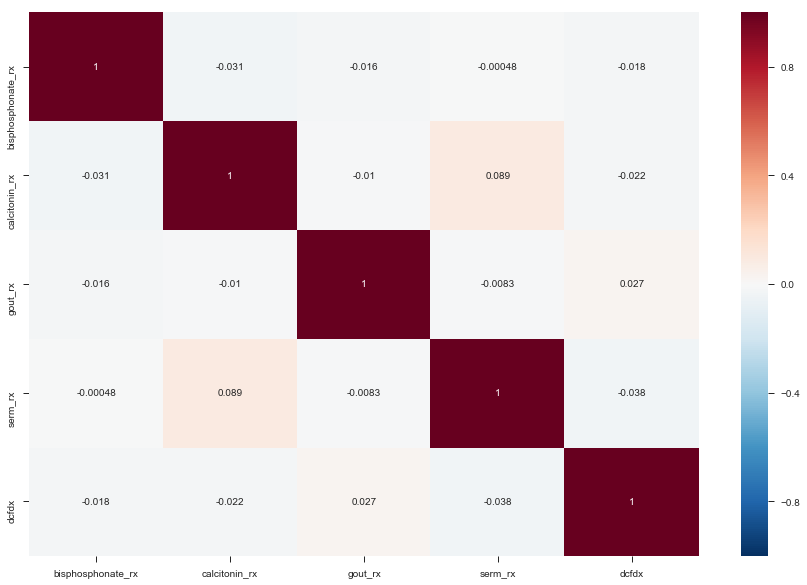

In [60]:
Brainproteins = df_combined_inner.filter(['bisphosphonate_rx',
 'calcitonin_rx','gout_rx','serm_rx'      
,'dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# Neurologic medications

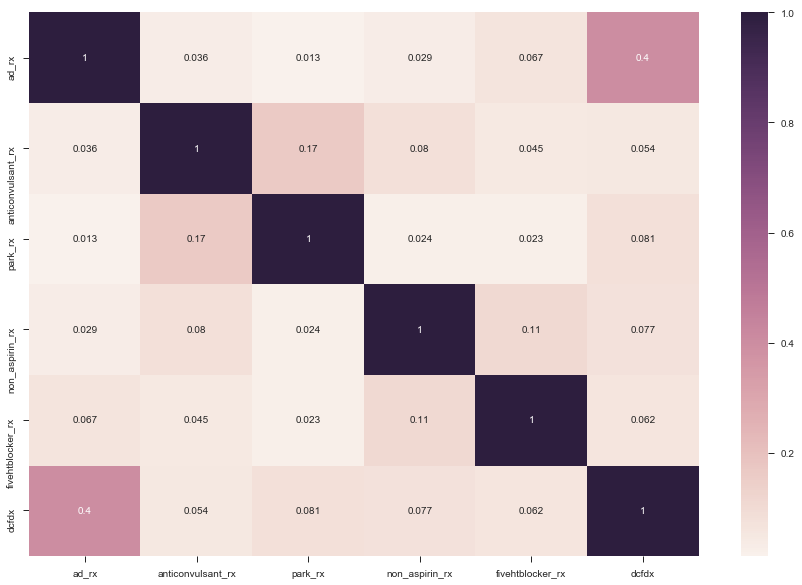

In [61]:
Brainproteins = df_combined_inner.filter(['ad_rx','anticonvulsant_rx','park_rx',
 'non_aspirin_rx','fivehtblocker_rx'       
,'dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

# pathology tests correlations

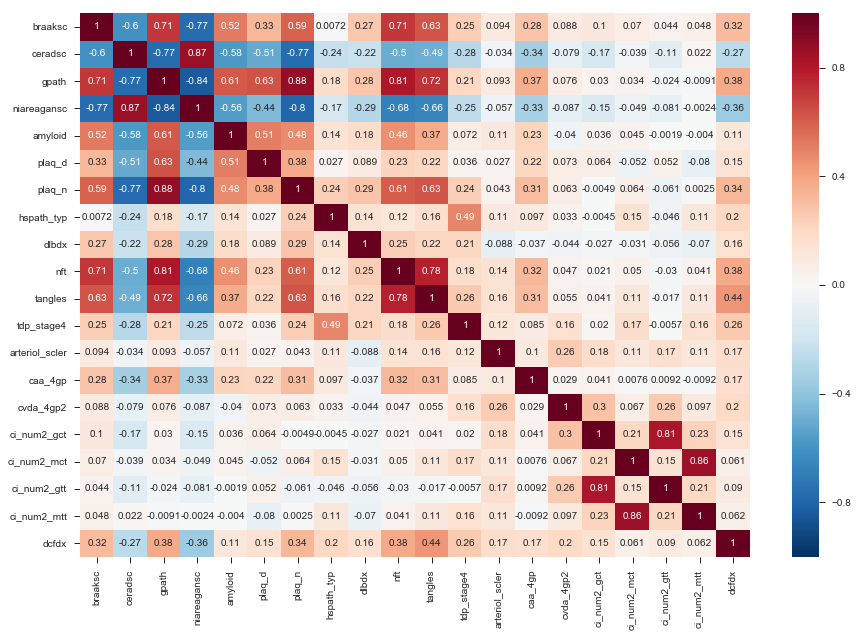

In [62]:
Brainproteins = df_combined_inner.filter(['braaksc',  
                                          
  'ceradsc','gpath','niareagansc','amyloid','plaq_d','plaq_n','hspath_typ',
 'dlbdx','nft','tangles','tdp_stage4',                                        
'arteriol_scler','caa_4gp','cvda_4gp2','ci_num2_gct','ci_num2_mct','ci_num2_gtt',                                  
'ci_num2_mtt','dcfdx'], axis=1)

corr_matrix2 =Brainproteins.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix2,annot=True)

#adding a column such that fu_year are seperated as 0 and rest
df['test'] = df['fu_year'].map(lambda x : 'year' if x>0 else 'baseline')

#converting study to integer from string(map-1 , ros=0)
df['study'] = df['study'].map(lambda x : 1 if x=='MAP' else 0)


# with baseline year
df_with_baseline_year = df.loc[df['test'] == 'baseline']
#df.loc[df['fu_year'].idxmax()]

#making different dataframes for all years seperately
df_with_1_year = df.loc[df['fu_year'] == 1]
df_with_2_year = df.loc[df['fu_year'] == 2]
df_with_3_year = df.loc[df['fu_year'] == 3]
df_with_4_year = df.loc[df['fu_year'] == 4]
df_with_5_year = df.loc[df['fu_year'] == 5]
df_with_6_year = df.loc[df['fu_year'] == 6]
df_with_7_year = df.loc[df['fu_year'] == 7]
df_with_8_year = df.loc[df['fu_year'] == 8]
df_with_9_year = df.loc[df['fu_year'] == 9]
df_with_10_year = df.loc[df['fu_year'] == 10]
df_with_11_year = df.loc[df['fu_year'] == 11]
df_with_12_year = df.loc[df['fu_year'] == 12]
df_with_13_year = df.loc[df['fu_year'] == 13]
df_with_14_year = df.loc[df['fu_year'] == 14]
df_with_15_year = df.loc[df['fu_year'] == 15]
df_with_16_year = df.loc[df['fu_year'] == 16]
df_with_17_year = df.loc[df['fu_year'] == 17]
df_with_18_year = df.loc[df['fu_year'] == 18]
df_with_19_year = df.loc[df['fu_year'] == 19]
df_with_20_year = df.loc[df['fu_year'] == 20]
df_with_21_year = df.loc[df['fu_year'] == 21]
df_with_22_year = df.loc[df['fu_year'] == 22]
df_with_23_year = df.loc[df['fu_year'] == 23]


# first considering just the baseline:

import numpy as np
#removing all the infinite values before split
df_with_baseline_year = df_with_baseline_year[np.isfinite(df_with_baseline_year['dcfdx'])]

df_with_baseline_year.replace([np.inf, -np.inf], np.nan)
df_with_baseline_year= df_with_baseline_year.fillna(df_with_baseline_year.median(), inplace=True)

df_with_baseline_year

from sklearn.model_selection import train_test_split
y_train = df_with_baseline_year['dcfdx']
x_train = df_with_baseline_year
del x_train['dcfdx']
del x_train['test']
del x_train['scaled_to']

In [ ]:
del x_train['projid']

In [ ]:
X_train, X_test, Y_train, y_test = train_test_split( x_train, y_train, test_size=0.33, random_state=1)



In [ ]:
type(x_train)

In [ ]:
#treating nan values
#import numpy as np
#from sklearn.preprocessing import Imputer
#imputer = Imputer()
#transformed_X = imputer.fit_transform(X_train)


In [ ]:
##np.any(np.isnan(y_train))# prooving even traget class has missing values



# Logistic REgression

In [ ]:
from sklearn.linear_model import LogisticRegression

l1 = LogisticRegression(penalty='l1')
l2 = LogisticRegression(penalty='l2')
model1 = l1.fit(X_train,Y_train)
model2 = l2.fit(X_train,Y_train)


# print top 10 features with weigjts

In [ ]:
l1_features_wgt=np.argsort(np.abs(l1.coef_[0]))[::-1]
flag=10
print("top 10 features:\n")
for i in l1_features_wgt:
    if flag>0:
        print("%s\t%0.3f" %(df.columns[i], l1.coef_[0][i]))
        flag-=1
    else:
        break

# l2 with top 10 features

In [ ]:
l2_features_wgt=np.argsort(np.abs(l2.coef_[0]))[::-1]
flag=10
print("top 10 features:\n")
for i in l2_features_wgt:
    if flag>0:
        print("%s\t%0.3f" %(df.columns[i], l2.coef_[0][i]))
        flag-=1
    else:
        break

In [ ]:
def Total_evidence(object):
    #instnce
    positive_evidence=[]
    negative_evidence=[]
    evidence = []
    for i,val in enumerate(object):
        evidence.append(val* l2.coef_[0][i])
        if val* l2.coef_[0][i] >0:
            positive_evidence.append(val* l2.coef_[0][i])
        else:
            negative_evidence.append(val* l2.coef_[0][i])
            
    total_positive_evidence=sum(positive_evidence)
    total_negative_evidence=sum(negative_evidence)
    return total_positive_evidence, total_negative_evidence,evidence

def evidence(object):
    #instnce
    positive_evidence=[]
    negative_evidence=[]
    
    for i,val in enumerate(object):
        if val* l2.coef_[0][i] >0:
            positive_evidence.append(val* l2.coef_[0][i])
        else:
            negative_evidence.append(val* l2.coef_[0][i])
    return positive_evidence, negative_evidence

def top_features(evidence,pos,neg):
    
    Top_neg_index = np.argsort(evidence)
    
    #Top_pos_index = evidence.argsort()[::-1][:n]
    if neg>3:
        idx = 3
    else:
        idx=neg
        
    if pos>3:
        idx1 = 3
    else:
        idx1=pos  
    return Top_neg_index[:idx],Top_neg_index[-idx1:]

In [ ]:
predict = l2.predict_proba(X_test)
np.argmax(predict[:,1])
X_test.iloc[np.argmax(predict[:,1])]

In [ ]:
predict = l2.predict_proba(X_test)
print(predict)

most_postive_object = X_test.iloc[(np.argmax(predict[:,1]))]
print("most positive object wrt prob:\n",most_postive_object )

a = Total_evidence(most_postive_object)
print("\ntotal positive evidence:",a[0])
print("\ntotal negative evidence:",a[1])
print("\nclass distributuion",(predict[np.argmax(predict[:,1])]))
print("\n evidences: ",a[2])

#for top features:
pos_evi=evidence(most_postive_object)[0]
neg_evi=evidence(most_postive_object)[1]

indexNeg= top_features(a[2],len(pos_evi),len(neg_evi))[0]
indexPos = top_features(a[2],len(pos_evi),len(neg_evi))[1]
#print(indexNeg,indexPos)
columns = X_test.columns

print("\n\ntop negative features are:",columns[indexNeg],"\ntop positive features",columns[indexPos])

In [ ]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(model1, X_test, y_test, cv=10)
predicted

In [ ]:
model1.score(X_test, y_test) 

In [ ]:
model2.score(X_test, y_test) 

# svm

In [ ]:
from sklearn import svm
clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

model3=clf.fit(X_train.values, Y_train.values) 

In [ ]:
clf.support_vectors_
model3.score(X_test, y_test) 

In [ ]:
#x=np.array(X_train.astype(np.integer))
#y=np.array(Y_train.astype(np.integer))
xarray = X_train.as_matrix
df_to_nparray = X_train.to_records(index=False)

df_to_nparray.astype(float)
df_to_nparray


In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


plot_decision_regions(X=df_to_nparray , y=y, clf=clf, res=0.02,legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()